<a href="https://colab.research.google.com/github/anyazarembski/Projects/blob/main/Project1_Zarembski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anya Zarembski: Project 1

#Starter Code: 

 For this project, I will be using the [World Happiness Data](https://www.kaggle.com/unsdsn/world-happiness). 


In [ ]:
#importing all pandas and ski-kit learn tools
from google.colab import drive
import pandas as pd
import sklearn
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#importing data from drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
happiness =pd.read_csv('/content/drive/MyDrive/CS167/datasets/happiness_data.csv')
happiness.head()

Mounted at /content/drive


,Overall rank,Year,Country or region,Score,GDP per capita,Social support and Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# Problem: 
I decided to use the world happiness dataset because I thought the predictor variables would be interesting to see how they relate to the target variable. Some questions I asked the dataset were: Which predictors are the most important in happiness?, Which machine learning method predicts happiness the best?, Is there a common thread between the more important predictor variables?
<br>
<br>Predictor Variables: GDP per capita,	Social support and Family,	Healthy life expectancy,	Freedom to make life choices,	Generosity, Perceptions of corruption
<br>Target Variable: (Happiness) Score

# Data Preparation
Luckily, the world happiness dataset didn't have any need to create dummy variables and only had one column with missing values. This made the data prep extremely easy. I checked to see if any columns had any missing values, and only one column did. Dropping the missing values did not significantly change the size of the dataset, so I dropped the missing values. All the predictor variables (GDP per capita, Social and Family Support, Healthy Life Expectancy, Freedom to make life choices, Generosity, and Perceptions of Corruption) were numeric variables, so I just normalized them to begin with, so I would hopefully get more accurate results to begin with. There was no need to create dummies. I also split them into training and testing data in this section, with a 0.2 test size set. 

In [ ]:
# data prep code 
print('Before: ', happiness.isna().any(), '\nSize: ', happiness.shape)
cl_happiness = happiness.dropna()
print('After: ', cl_happiness.isna().any(), '\nSize: ', happiness.shape)

Before:  Overall rank                    False
Year                            False
Country or region               False
Score                           False
GDP per capita                  False
Social support and Family       False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption        True
dtype: bool 
Size:  (782, 10)
After:  Overall rank                    False
Year                            False
Country or region               False
Score                           False
GDP per capita                  False
Social support and Family       False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption       False
dtype: bool 
Size:  (782, 10)


In [ ]:
#Splitting data into Training Data and Testing Data and normalizing that data.

#split data, identify target and predictors
predictors = ['GDP per capita',	'Social support and Family',	'Healthy life expectancy',	'Freedom to make life choices',	'Generosity', 'Perceptions of corruption']
target = "Score"
train_data, test_data, train_sln, test_sln = \
        train_test_split(cl_happiness[predictors], cl_happiness[target], test_size = 0.2, random_state=41)

#normalize dataset
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

# Metrics
I used r^2 to test this data set. It is a regression model, so r^2 is fitting. I used r^2 rather than MSE or MAE because it is more interpretable. It also between 0 and 1, where as with MSE or MAE, the range of the values differs for every dataset, and what may be a high error for one set, might be a low error for another. I wasn't sure what kind of variety would be present with this data set, so I decided to opt for r^2, because of how universal it is. 

# Baseline Performance
The baseline or average performance ended up giving an r^2 of slightly less than 0, which is exactly what the baseline should predict. It would be expected that if a dataset were to randomly choose the r^2 would be 0. 

In [ ]:
# baseline model 

dummy = DummyRegressor() # create dummy regressor

dummy.fit(train_data, train_sln) # fit dummy to data

predictions = dummy.predict(test_data) # make dummy predictions

r2_dummy = metrics.r2_score(test_sln, predictions) # find and print r^2
print('r^2 ', r2_dummy)

print('example predictions from dummy model: ', predictions[0:30])

r^2  -2.0080803493582877e-05
example predictions from dummy model:  [5.37823397 5.37823397 5.37823397 5.37823397 5.37823397 5.37823397
 5.37823397 5.37823397 5.37823397 5.37823397 5.37823397 5.37823397
 5.37823397 5.37823397 5.37823397 5.37823397 5.37823397 5.37823397
 5.37823397 5.37823397 5.37823397 5.37823397 5.37823397 5.37823397
 5.37823397 5.37823397 5.37823397 5.37823397 5.37823397 5.37823397]


# Model planning and Execution


The k value with the highest r^2 value was  7  with a r^2 value of  0.7916529882045436


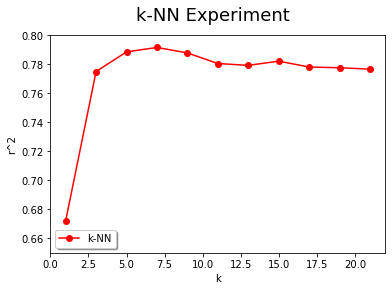

In [ ]:
#finding the k value with the highest r^2 
k_vals = [1,3,5,7,9,11,13,15,17,19,21]
kNN_accuracies = []
best_k = 0
best_r2 = 0

for k in k_vals:
    test_knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    test_knn.fit(train_data, train_sln)
    predictions = test_knn.predict(test_data)
    r2_test = metrics.r2_score(test_sln, predictions)
    kNN_accuracies.append(r2_test)
    if (r2_test > best_r2):
      best_k = k
      best_r2 = r2_test

print("The k value with the highest r^2 value was ", best_k, " with a r^2 value of ", best_r2)

plt.suptitle('k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,22,.65,.8])

plt.show()

In [ ]:
#normalized standard kNN with 5 neighbors

#create regressor
knn = neighbors.KNeighborsRegressor(n_neighbors=7)

#fit regressor to data
knn.fit(train_data, train_sln)

#make predictions
predictions = knn.predict(test_data)

#metric to test how our model performed
r2_kNN = metrics.r2_score(test_sln, predictions)
print('r^2: ', r2_kNN)

r^2:  0.7916529882045436


The k value with the highest r^2 value was  7  with a r^2 value of  0.7959237915523076


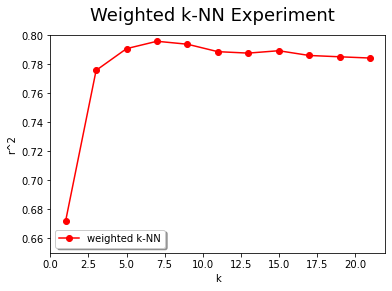

In [ ]:
wkNN_accuracies = []
best_wk = 0
best_wr2 = 0

for k in k_vals:
    test_wknn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='distance')
    test_wknn.fit(train_data, train_sln)
    predictions = test_wknn.predict(test_data)
    r2_wtest = metrics.r2_score(test_sln, predictions)
    wkNN_accuracies.append(r2_wtest)
    if (r2_wtest > best_wr2):
      best_wk = k
      best_wr2 = r2_wtest

print("The k value with the highest r^2 value was ", best_wk, " with a r^2 value of ", best_wr2)

plt.suptitle('Weighted k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2')
plt.plot(k_vals,wkNN_accuracies,'ro-',label='weighted k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,22,.65,.8])

plt.show()

In [ ]:
#weighted + normalized kNN with 7 neighbors and manhatten distance 

#create regressor
wknn = neighbors.KNeighborsRegressor(weights= 'distance', p=1, n_neighbors=7)

#fit regressor to data
wknn.fit(train_data, train_sln)

#make predictions
predictions = wknn.predict(test_data)

#metric to test how our model performed
r2_kNNw = metrics.r2_score(test_sln, predictions)
print('r^2: ', r2_kNNw)

r^2:  0.8034385221533155


r^2:  0.6763382425791543


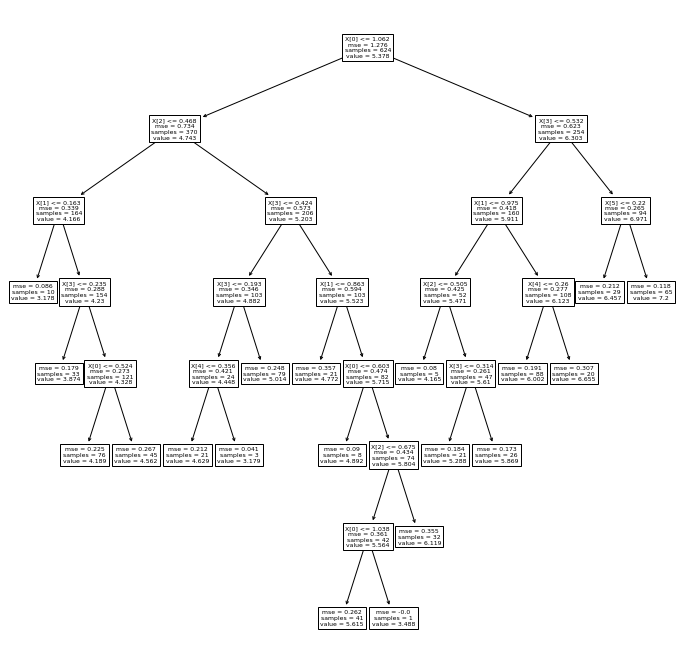

In [ ]:
#normalized decision tree with a minimum purity decrease of .005

dt = tree.DecisionTreeRegressor(min_impurity_decrease = .005) # create regressor

dt.fit(train_data, train_sln) # fit regressor to data

predictions = dt.predict(test_data) # make predictions

r2_dt = metrics.r2_score(test_sln, predictions) # vmetric to test how our model performed
print('r^2: ', r2_dt)

#graph decision tree
plt.figure(figsize=(12,12))
tree.plot_tree(dt);

r^2:  0.7962476482419194


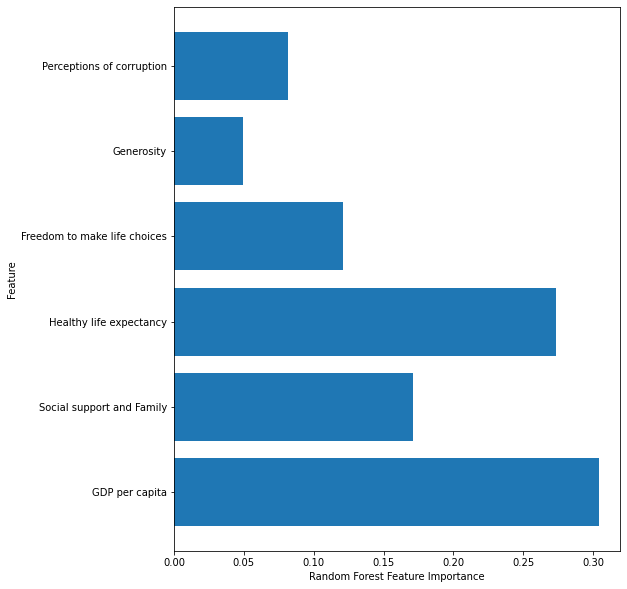

In [ ]:
#random forest with the max features set to square root

#create forest regressor
forest = RandomForestRegressor(random_state = 0, n_estimators=100, max_features = 'sqrt')

#fit forest to data
forest.fit(train_data,train_sln)

#make predictions
predictions = forest.predict(test_data)

#find and print r^2 value
r2_forest = metrics.r2_score(test_sln, predictions)
print('r^2: ', r2_forest)

#feature indicator
index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,forest.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

# Results

I first ran a knn with the default setting except with n_neighbors set to 7. I found the best possible k value by running a method that tested every k from 1-21, and used the highest scoring k, which was 7. I then also ran a wknn algorithm with 7 neighbors and using manhattan distance, because from just playing with the parameters, I found that it resulted in a higher r^2 value.I did the same for a weighted kNN. The results were still 7.
<br>
<br>I then ran a decsion tree algorithm. I found that it had a much higher r^2 when I increased the min_impurity_decrease to .005. This made the tree smaller and better to visualize. 
<br>
<br>My random forest model used the square root max features, which from playing with the parameters, resulted in a slightly higher r^2 value. 
<br>
<br>Below are three graphs. The first one shows the data on which k value resulted in the best model. The second shows which feature was most important in the random forest, so we can see which predictor variable is the most important. The third shows each model's r^2 value compared to eachother, which allows comparison between each model. 

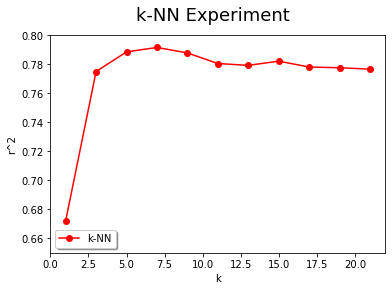

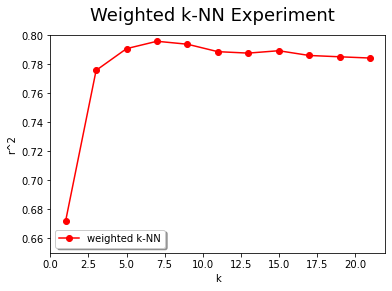

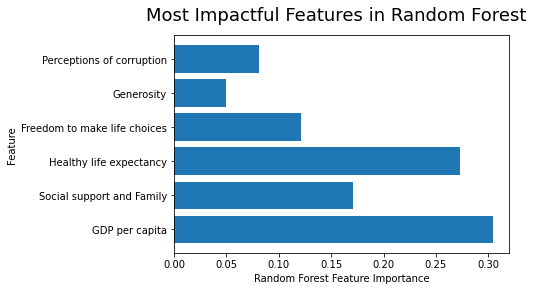

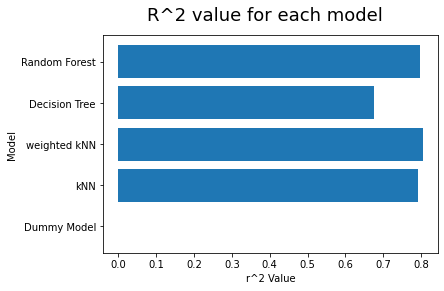

In [ ]:
#shows which k value is best for a knn model
plt.suptitle('k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,22,.65,.8])
plt.show()

#shows which k value is best for a weighted knn
plt.suptitle('Weighted k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2')
plt.plot(k_vals,wkNN_accuracies,'ro-',label='weighted k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,22,.65,.8])
plt.show()

#shows which features are most important in forest model
index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.suptitle("Most Impactful Features in Random Forest", fontsize=18) 
plt.barh(index,forest.feature_importances_,height=0.8)
plt.ylabel('Feature')
plt.yticks(index,predictors) 
plt.xlabel("Random Forest Feature Importance")
plt.show()

#shows which model had the highest r^2 value
models = ['Dummy Model', 'kNN', 'weighted kNN', 'Decision Tree', 'Random Forest']
r2_values = [r2_dummy, r2_kNN, r2_kNNw, r2_dt, r2_forest]

plt.suptitle('R^2 value for each model', fontsize = 18)
plt.barh(models, r2_values, height=.8)
plt.ylabel('Model')
plt.xlabel('r^2 Value')
plt.show()

# Bumps in the Road:
I didn't run into any major issues in this project. The dataset was pretty clean and I didn't have to creat dummy variables, which after speaking to classmates who chose different datasets, the dummy variables seemed to be the most difficult part. I could've transformed countries to continents, and then created dummy variables from that, but I didn't think that data would be that valuable just based on what I know about world politics and happiness. <br><br>However I wish that I hadn't started with normalized data. I think it would've been really interesting ot see how normalization played into the dataset. Normalizing the data makes it more useful generally, but I would've liked to see how much it improved the results. 
<br><br>Also, this is more about colab and python notebooks in general, but I wish there was a way to play with the data and save what you've done without just copying and creating new code everytime. It would be nice to be able to report everything I did when I was playing with the parameters, rather than just saying "I messed with the parameters" and then having a conclusion.


# Conclusions
<br>It is very clear from comparing all the models here that decision trees were the worst model for this dataset. They had an r^2 score far below all the other models. I think this is because this data cannot be easily split up, even though some facotrs were far more important, there weren't any features that were completely irrelevent. Random forests, kNN, and weighted kNN were all around .79-.8 in r^2. These models were consistly around this value when I played with the parameters. This tells me that any of these models are great for this dataset, but that .8 is probably the about highest r^2 value you can get for this dataset. There is too much variable when you're using more human data to accurately predict 100% of the time. 0.8 is very respectable though. 
<br><br>I found it very predictable that the biggest factor in happiness were GDP per captia and healthy life expectancy. People, even within the USA, where we have a higher happiness score, are much happier when they don't have to worry about money and health. These two factors, from my own experience, make like more or less enjoyable very easily. Many of the other predictors are things that are nice to have but not something people must think about every day to be happy. I would be really interested to see how other factors like wealth inequality, social inequality, types of government, and more effected the data. 
